In [1]:
%config Completer.use_jedi = False

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from dotenv import load_dotenv
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.fundamentaldata import FundamentalData
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from pprint import pprint
import pickle

In [3]:
plt.rcParams["figure.figsize"] = (14,7)

In [4]:
plt.style.use('ggplot')

In [5]:
pwd

'/Users/tarekatwan/Documents/Coding/Repos/stock_timeseries_forecasting'

# 1. Data Collection

# AlphaVantage API and Datasets

In [6]:
import os
load_dotenv('ts/keys.env')
alpha = os.environ.get('alpha')

In [7]:
ts = TimeSeries(key=alpha, output_format='pandas')

In [8]:
fd = FundamentalData(key=alpha, output_format='pandas')

In [12]:
ti = TechIndicators(key=alpha, output_format='pandas')

In [19]:
sp = SectorPerformances(key=alpha, output_format='pandas')

## Get Sector Performnace Data

In [24]:
from tqdm import tqdm
import time

def get_sp_data():
    data, metadata = sp.get_sector()
        
    return data

## Get Fundamentals Data

In [54]:
from tqdm import tqdm
import time

def get_fd_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = fd.get_income_statement_annual(symbol=symbol)
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Technical Indicators Data

In [16]:
from tqdm import tqdm
import time

def get_ti_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = ti.get_rsi(symbol=symbol)
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Daily Stock Data

In [18]:
from tqdm import tqdm
import time

def get_price_data(symbols):
    stocks = {}
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        data, metadata = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
        stocks[symbol] = {
                                'data': data,
                                'meta': metadata
                                }

        
    return stocks

## Get Company Overview Data

In [204]:
from tqdm import tqdm
import time
def get_fundamental_overview(symbols):
    overview = []
    for i, symbol in enumerate(tqdm(symbols)):
        if i > 0 and i % 5 == 0:
            time.sleep(60)
        f = fd.get_company_overview(symbol)
        overview.append(f[0])
  
    fd_cols = ['ReturnOnEquityTTM',
              '52WeekHigh',
              '50DayMovingAverage',
              '200DayMovingAverage',
              'EPS',
              'Sector',
              'Industry',
              'PEGRatio',
              'Beta',
              'PERatio',
              'SharesShort',
              'EVToEBITDA',
              'RevenuePerShareTTM',
              'AnalystTargetPrice',
              'QuarterlyRevenueGrowthYOY',
              'QuarterlyEarningsGrowthYOY']
        
    fundamental_overivew = []

    for i in overview:
        fundamental_overivew.append(i.set_index('Symbol')[fd_cols])
    fundamental_overivew = pd.concat(fundamental_overivew)
    return fundamental_overivew

## Pickle Data for Data Persistance
`uncomment when needed given API limit`

In [43]:
# stocks_strong = ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME']
# stocks_poor = ['CCL', 'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS']

In [205]:
# Get Fundamental Overview Data

overveiw = get_fundamental_overview(stocks_strong)
overveiw.to_pickle('fundamental_overview_s.pickle')

100%|██████████| 8/8 [01:04<00:00,  8.01s/it]


In [209]:
# Get Fundamental Overview Data
#overveiw = get_fundamental_overview(stocks_poor)
#overveiw.to_pickle('fundamental_overview_p.pickle')

In [ ]:
# Get Fundamentals
# ss = get_fd_data(stocks_strong)
# pickle.dump(ss, open('strong_fundamental.pickle', 'wb'))

In [210]:
# Get Fundamentals
# ss = get_fd_data(stocks_poor)
# pickle.dump(ss, open('poor_fundamental.pickle', 'wb'))

100%|██████████| 7/7 [01:03<00:00,  9.10s/it]


In [57]:
# Get Technical Indicators
# ss = get_ti_data(stocks_strong)
# pickle.dump(ss, open('strong_ti.pickle', 'wb'))

In [212]:
#Get Technical Indicators
# ss = get_ti_data(stocks_poor)
# pickle.dump(ss, open('poor_ti.pickle', 'wb'))

100%|██████████| 7/7 [01:05<00:00,  9.39s/it]


In [58]:
# Get Sector Peformance
# ss = get_sp_data()
# pickle.dump(ss, open('strong_sp.pickle, 'wb'))

In [59]:
# stocks_strong = ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME']
# ss =  get_sp_data()
# pickle.dump(ss, open('strong_sp.pickle', 'wb'))

In [60]:
# Get Prices Weak
# sp = get_data(stocks_poor)
# pickle.dump(sp, open('poor.pickle', 'wb'))

## Read Pickle Data 

In [6]:
ss_price = pickle.load(open('strong.pickle', 'rb'))
sp_price = pickle.load(open('poor.pickle', 'rb'))
ss_fund = pickle.load(open('strong_fundamental.pickle', 'rb'))
sp_fund = pickle.load(open('poor_fundamental.pickle', 'rb'))
sector = pickle.load(open('strong_sp.pickle', 'rb'))
ss_ti = pickle.load(open('strong_ti.pickle', 'rb'))
sp_ti = pickle.load(open('poor_ti.pickle', 'rb'))
overview_s = pickle.load(open('fundamental_overview_s.pickle', 'rb'))
overview_p = pickle.load(open('fundamental_overview_p.pickle', 'rb'))

# 2. Data Formatting and Cleanup

## Inspect Data

In [7]:
sector

Rank A: Real-Time Performance  \
Financials                                     0.0287   
Materials                                      0.0201   
Energy                                         0.0201   
Industrials                                    0.0162   
Real Estate                                    0.0132   
Information Technology                         0.0095   
Communication Services                         0.0081   
Consumer Discretionary                         0.0079   
Consumer Staples                               0.0058   
Health Care                                    0.0036   
Utilities                                      0.0016   

                        Rank B: Day Performance  Rank C: Day Performance  \
Financials                               0.0287                  -0.0083   
Materials                                0.0201                   0.0027   
Energy                                   0.0201                  -0.0361   
Industrials                              0.0162                   0.0041   
Real Estate                              0.0132                   0.0317   
Information Technology                   0.0095                   0.0228   
Communication Services                   0.0081                   0.0048   
Consumer Discretionary                   0.0079                   0.0254   
Consumer Staples                         0.0058                   0.0073   
Health Care                              0.0036                   0.0128   
Utilities                                0.0016                   0.0102   

                        Rank D: Month Performance  Rank E: Month Performance  \
Financials                                -0.0353                     0.0540   
Materials                                 -0.0430                     0.0457   
Energy                                    -0.0442                     0.0908   
Industrials                               -0.0106                     0.0399   
Real Estate                                0.0175                     0.1401   
Information Technology                     0.0817                     0.0770   
Communication Services                     0.0328                     0.0654   
Consumer Discretionary                     0.0694                     0.0568   
Consumer Staples                          -0.0004                     0.0234   
Health Care                                0.0570                     0.1042   
Utilities                                  0.0016                    -0.0036   

                        Rank F: Year-to-Date (YTD) Performance  \
Financials                                              0.2442   
Materials                                               0.1439   
Energy                                                  0.3959   
Industrials                                             0.1676   
Real Estate                                             0.2598   
Information Technology                                  0.1593   
Communication Services                                  0.2075   
Consumer Discretionary                                  0.1320   
Consumer Staples                                        0.0410   
Health Care                                             0.1340   
Utilities                                               0.0297   

                        Rank G: Year Performance  Rank H: Year Performance  \
Financials                                0.5843                    0.3786   
Materials                                 0.4400                    0.4242   
Energy                                    0.4515                   -0.2863   
Industrials                               0.5095                    0.4432   
Real Estate                               0.3188                    0.3975   
Information Technology                    0.4020                    1.1305   
Communication Services                    0.4196                    0.7708   
Consumer Discretionary                    0.3330

In [8]:
ss_ti['TSLA']['data'].head()

RSI
date               
2010-07-28  41.5195
2010-07-29  40.6720
2010-07-30  39.7261
2010-08-02  43.0581
2010-08-03  46.3398

In [9]:
ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding')

reportedCurrency grossProfit totalRevenue costOfRevenue  \
fiscalDateEnding                                                           
2020-12-31                    USD  6630000000  31536000000   24906000000   
2019-12-31                    USD  4069000000  24578000000   20509000000   
2018-12-31                    USD  4042000000  21461000000   17419000000   
2017-12-31                    USD  2223000000  11759000000    9536000000   
2016-12-31                    USD  1599257000   7000132000    5400875000   

                 costofGoodsAndServicesSold operatingIncome  \
fiscalDateEnding                                              
2020-12-31                        289000000      1994000000   
2019-12-31                        193000000       -69000000   
2018-12-31                         85272000      -388000000   
2017-12-31                       7797183000     -1632000000   
2016-12-31                       4559939000      -667340000   

                 sellingGeneralAndAdministrative researchAndDevelopment  \
fiscalDateEnding                                                          
2020-12-31                            3145000000             1491000000   
2019-12-31                            2646000000             1343000000   
2018-12-31                            2835000000             1460000000   
2017-12-31                            2477000000             1378000000   
2016-12-31                            1432189000              834408000   

                 operatingExpenses investmentIncomeNet  ... depreciation  \
fiscalDateEnding                                        ...                
2020-12-31              4636000000            30000000  ...   1570000000   
2019-12-31              4138000000            44000000  ...   1370000000   
2018-12-31              4430000000            24533000  ...   1110000000   
2017-12-31              3855000000            19686000  ...    769000000   
2016-12-31              2266597000             8530000  ...    477300000   

                 depreciationAndAmortization incomeBeforeTax incomeTaxExpense  \
fiscalDateEnding                                                                
2020-12-31                         399000000      1013000000        292000000   
2019-12-31                         343000000      -752000000        110000000   
2018-12-31                          66000000      -918000000         58000000   
2017-12-31                        1636003000     -1930000000         32000000   
2016-12-31                         947099000      -648216000         26698000   

                 interestAndDebtExpense netIncomeFromContinuingOperations  \
fiscalDateEnding                                                            
2020-12-31                    853000000                         862000000   
2019-12-31                    685000000                        -775000000   
2018-12-31                    663071000                       -1062582000   
2017-12-31                    471259000                       -2240578000   
2016-12-31                    198810000                        -773046000   

                 comprehensiveIncomeNetOfTax         ebit      ebitda  \
fiscalDateEnding                                                        
2020-12-31                        1120000000   1761000000  2160000000   
2019-12-31                        -890000000    -67000000   276000000   
2018-12-31                       -1018000000   -255000000  -189000000   
2017-12-31                       -1905000000  -1459000000   177003000   
2016-12-31                        -695098000   -449406000   497693000   

                    netIncome  
fiscalDateEnding               
2020-12-31          721000000  
2019-12-31         -862000000  
2018-12-31         -976000000  
2017-12-31        -1962000000  
2016-12-31         -674914000  

[5 rows x 25 columns]

In [10]:
ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding').columns

Index(['reportedCurrency', 'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')

In [11]:
ss_price['TSLA']['data'].head()

1. open  2. high    3. low  4. close  5. adjusted close  \
date                                                                   
2021-07-08  628.3700   654.43  620.4600    652.81             652.81   
2021-07-07  664.2700   665.70  638.3200    644.65             644.65   
2021-07-06  681.7115   684.00  651.4002    659.58             659.58   
2021-07-02  678.9800   700.00  673.2600    678.90             678.90   
2021-07-01  683.9200   687.99  672.8000    677.92             677.92   

             6. volume  7. dividend amount  8. split coefficient  
date                                                              
2021-07-08  22371172.0                 0.0                   1.0  
2021-07-07  18791960.0                 0.0                   1.0  
2021-07-06  23284450.0                 0.0                   1.0  
2021-07-02  27097374.0                 0.0                   1.0  
2021-07-01  18634522.0                 0.0                   1.0

In [12]:
def get_adjclose(stocks):
    close_price = []
    for k, v in stocks.items():
        data = stocks[k]['data']['5. adjusted close'].to_frame()
        data.columns = ['close']
        close_price.append((k, data))
    return close_price

In [13]:
s_close = get_adjclose(ss_price)
p_close = get_adjclose(sp_price)

In [14]:
def financial_statement(data):
    data_fundamentals = []
    for k,v in data.items():
        d = v['data'].reset_index(drop=True)
        d['symbol'] = k
        d = d.set_index(['symbol','fiscalDateEnding'])[['netIncome', 'ebitda', 'costOfRevenue', 'costofGoodsAndServicesSold']]
        data_fundamentals.append(d.sort_index())
    return data_fundamentals
#ss_fund['TSLA']['data'].reset_index(drop=True).set_index('fiscalDateEnding')

In [15]:
data_fundamentals_s = financial_statement(ss_fund)
data_fundamentals_p = financial_statement(sp_fund)

In [16]:
data_fundamentals_s[4]

netIncome       ebitda costOfRevenue  \
symbol fiscalDateEnding                                          
NFLX   2016-12-31         186678000   5304771000    6257462000   
       2017-12-31         558929000   7169064000    8033000000   
       2018-12-31        1211242000   9261683000    9967538000   
       2019-12-31        1866916000  11924080000   12440213000   
       2020-12-31        2761395000  15392201000   15276319000   

                        costofGoodsAndServicesSold  
symbol fiscalDateEnding                             
NFLX   2016-12-31                       6029901000  
       2017-12-31                       7659666000  
       2018-12-31                       9967538000  
       2019-12-31                      12440213000  
       2020-12-31                      15276319000

In [17]:
data_fundamentals_p[4]

netIncome      ebitda costOfRevenue  \
symbol fiscalDateEnding                                         
OKE    2016-12-31         352039000  1045996000    6496124000   
       2017-12-31         387841000  1332681000    9538045000   
       2018-12-31        1151703000  1996126000    9422708000   
       2019-12-31        1278577000  2154664000    6788040000   
       2020-12-31         612809000  1526002000    5110146000   

                        costofGoodsAndServicesSold  
symbol fiscalDateEnding                             
OKE    2016-12-31                        757184000  
       2017-12-31                        833586000  
       2018-12-31                        907068000  
       2019-12-31                        982864000  
       2020-12-31                        886204000

In [18]:
def clean_ti(d):
    cols = []
    data = []
    for k,v in d.items():
        cols.append(k)
        data.append(v['data'].rename(columns={'RSI': k}))
    rsi = pd.concat([i for i in data], axis=1).dropna()
    return rsi

In [19]:
rsi_s = clean_ti(ss_ti)
rsi_p = clean_ti(sp_ti)

In [20]:
def plot_stocks(df, year, normalize=True, periods=5, title=None, lag=None, window=None, volatility=False):
    '''
    Input: 
         df (Time Series DataFrame with DateTimeIndex)
         year (integer) representing year
         periods (integer) representing number of years. Defaul = 5
         title (optional). Default = None
         normalize (bool) Default = True
         lag (integer) represents return 
         window (integer) rolling window
         volatility (bool) whether to use mean or std
         
    Output: Produces a plot
    '''
    yr = str(year)
    pr = str(year+periods)
    
    for k,v in df:
        slice_v = v.sort_index()[yr:pr]

        slice_min = slice_v.min()
        slice_max = slice_v.max()
        
        p_n = (slice_v-slice_min)/(slice_max-slice_min)
        
        if lag:
            p = slice_v.pct_change(lag)
        elif window:
            if volatility:
                p = (p_n if normalize else slice_v).rolling(window).std()
            else:
                p = (p_n if normalize else slice_v).rolling(window).mean()
        else:
            p = (p_n if normalize else slice_v)

        plt.plot(p, label=k)
        plt.title(title)
        plt.legend()

In [21]:
# sector


## Summary of Variables/DataFrames

|Variable|Type|Description|
|--|----|---|
|overivew_(s or p)|DataFrame (Indexed by Symbol)| 1 Row per Symbol with select number of Fundamental Measures|
|rsi_(s or p)|DataFrame (DateTimeIndex)| Contains daily Relative Strength Index (RSI) for each stock|
|s_close | Dictionary | Strong Performers Adjusted Daily Closing Price |
|p_close | Dictionary | Weak Performers Adjusted Daily Closing Price |
|df_all_(s or p) | DataFrame (DateTimeIndex) | Combined all s_close symbols into a DataFrame for Adjusted Daily Closing Price |
|data_fundamentals_(s or p) | List of DataFrames (Index: Symbol & FiscalYear | Annual Income Statement metrics for each FiscalYear|
|sector | DataFrame (Indexed by Sector Name) | Sector related measures each row represents a sector |


# 3. Exploratory Data Analysis with Visualizations

In [22]:
year = 2018
periods=4

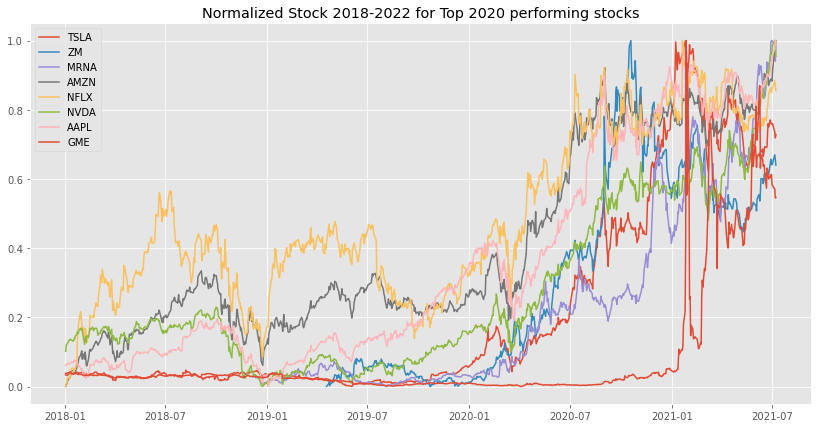

In [23]:
plot_stocks(df=s_close, year=year, periods=periods, title=f'Normalized Stock {year}-{year+periods} for Top 2020 performing stocks')

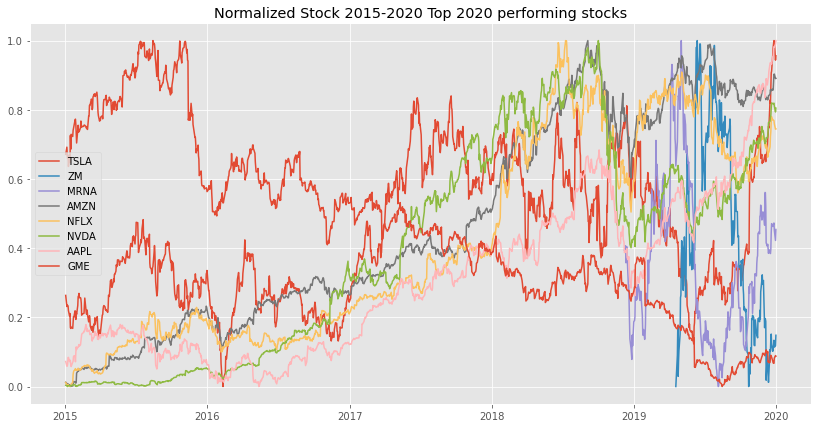

In [24]:
plot_stocks(df=s_close, year=2015, periods=4, title='Normalized Stock 2015-2020 Top 2020 performing stocks')

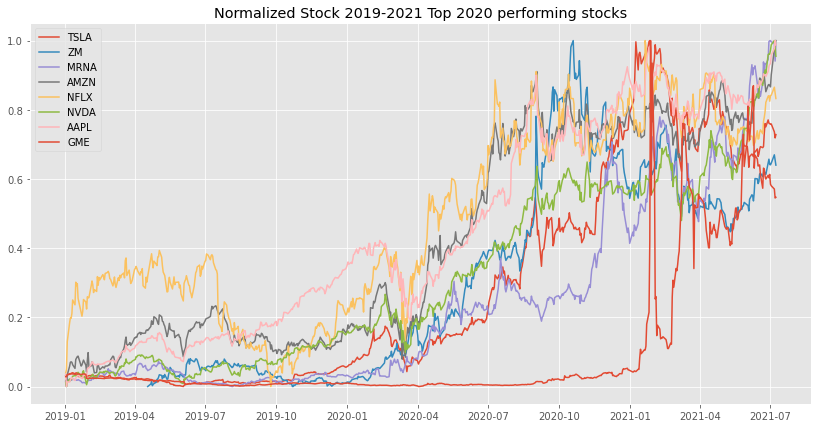

In [25]:
plot_stocks(df=s_close, year=2019, periods=2, title='Normalized Stock 2019-2021 Top 2020 performing stocks')

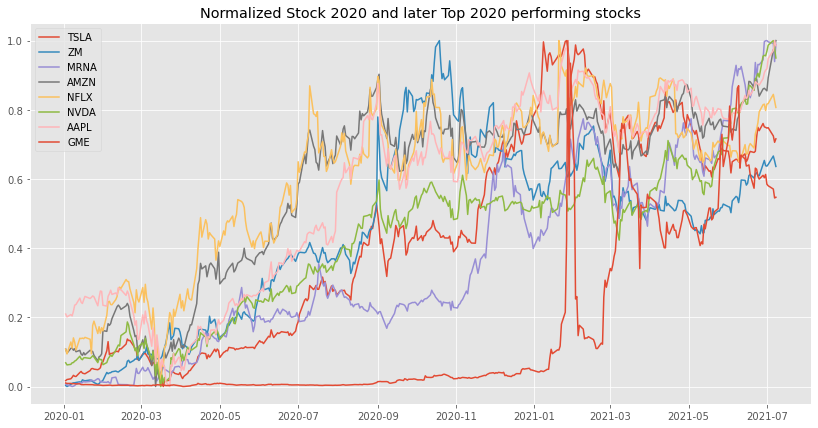

In [26]:
plot_stocks(df=s_close, year=2020, periods=2, title='Normalized Stock 2020 and later Top 2020 performing stocks')

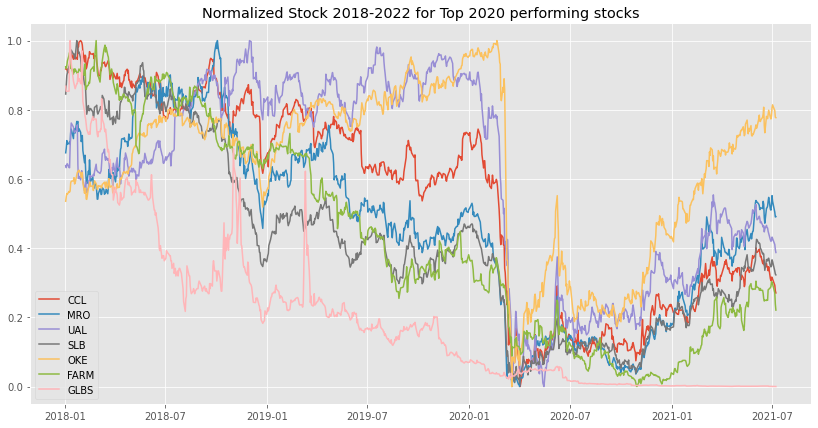

In [27]:
plot_stocks(df=p_close, year=year, periods=periods, title=f'Normalized Stock {year}-{year+periods} for Top 2020 performing stocks')

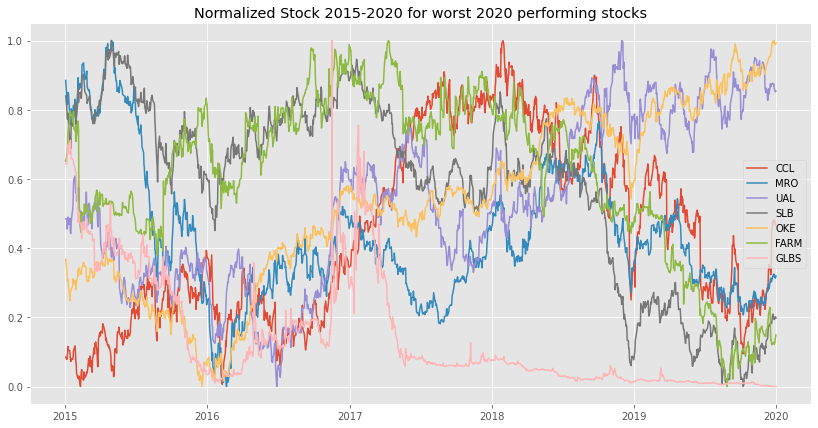

In [28]:
plot_stocks(df=p_close, year=2015, periods=4, title='Normalized Stock 2015-2020 for worst 2020 performing stocks')

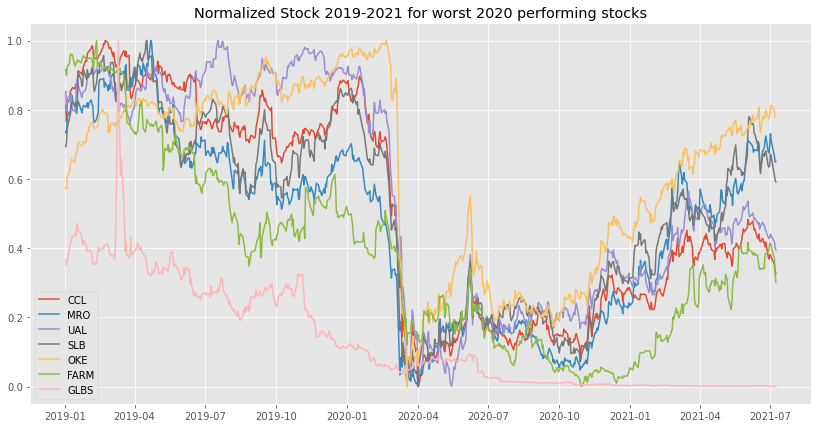

In [29]:
plot_stocks(df=p_close, year=2019, periods=2, title='Normalized Stock 2019-2021 for worst 2020 performing stocks')

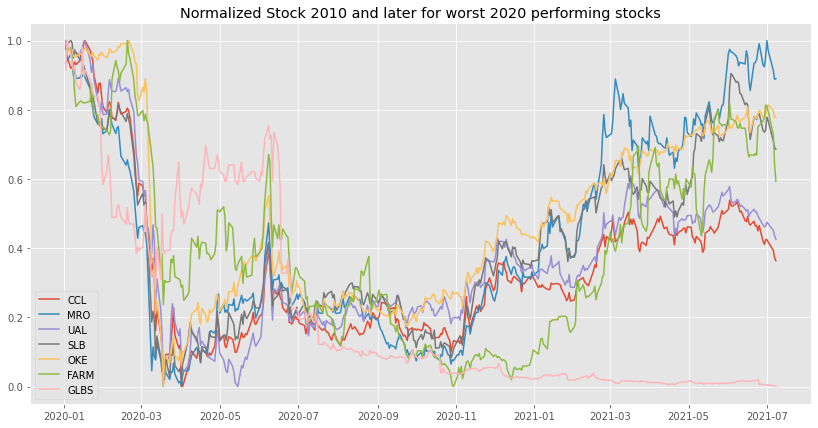

In [30]:
plot_stocks(df=p_close, year=2020, periods=2, title='Normalized Stock 2010 and later for worst 2020 performing stocks')

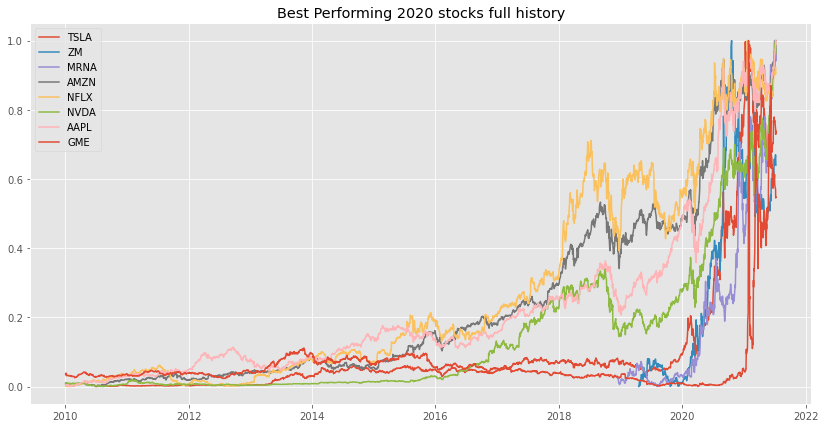

In [31]:
plot_stocks(df=s_close, year=2010, periods=11, title='Best Performing 2020 stocks full history')

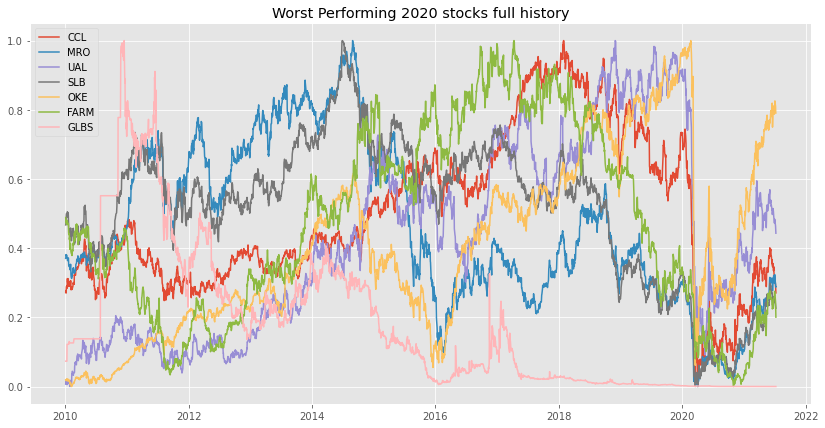

In [32]:
plot_stocks(df=p_close, year=2010, periods=11, title='Worst Performing 2020 stocks full history')

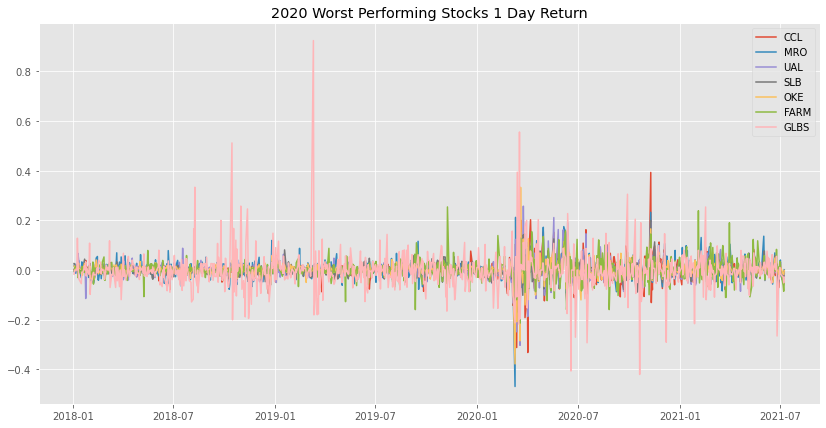

In [33]:
plot_stocks(df=p_close, year=year, periods=11, lag=1, title='2020 Worst Performing Stocks 1 Day Return')

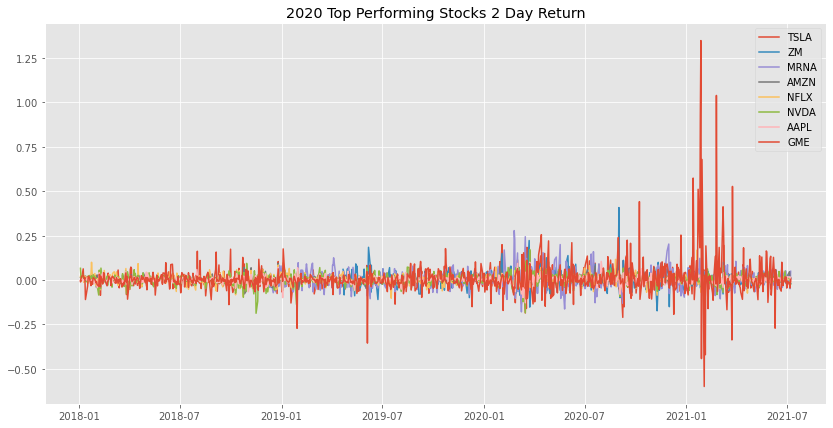

In [34]:
plot_stocks(df=s_close, year=year, periods=11, lag=1, title='2020 Top Performing Stocks 2 Day Return')

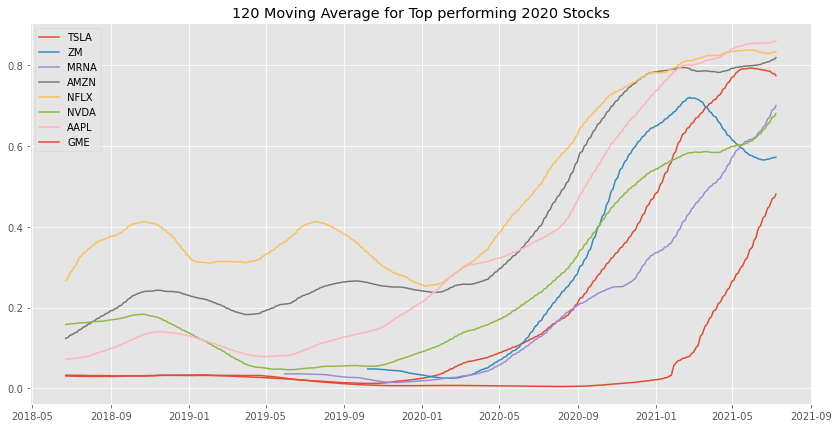

In [35]:
plot_stocks(df=s_close, year=year, periods=11, window=120, title='120 Moving Average for Top performing 2020 Stocks')

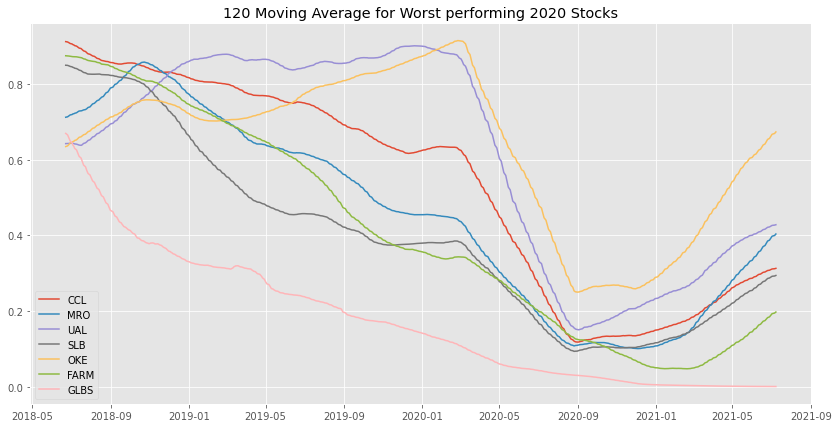

In [36]:
plot_stocks(df=p_close, year=year, periods=11, window=120, title='120 Moving Average for Worst performing 2020 Stocks')

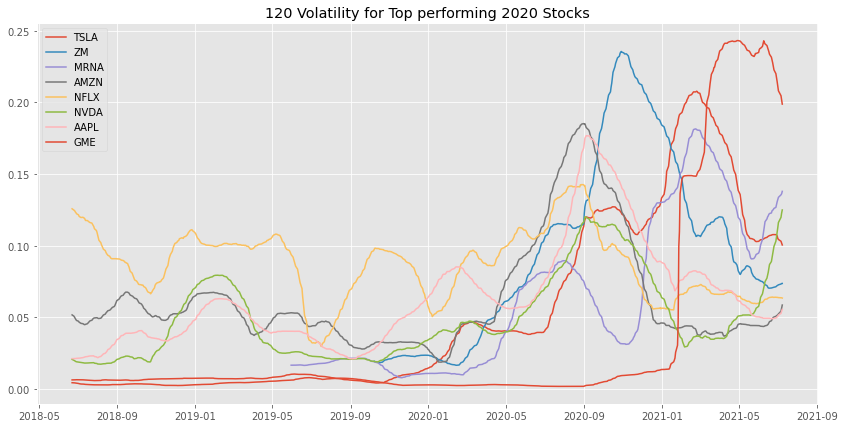

In [37]:
plot_stocks(df=s_close, year=year, periods=11, window=120, volatility=True, title='120 Volatility for Top performing 2020 Stocks')

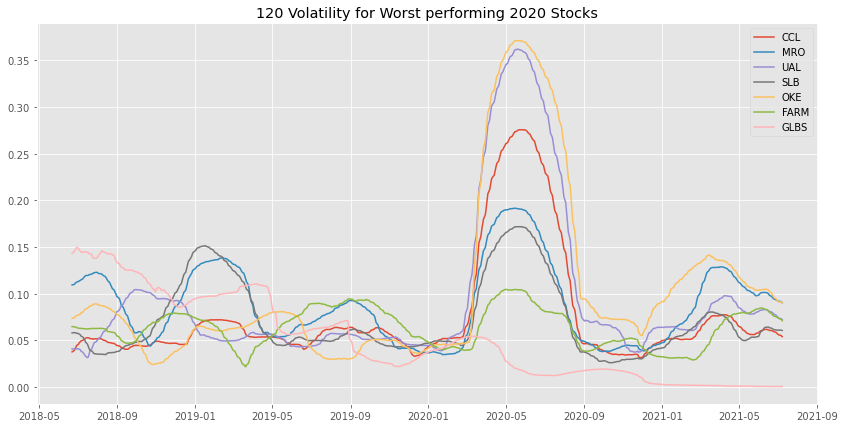

In [38]:
plot_stocks(df=p_close, year=year, periods=periods, window=120, volatility=True, title='120 Volatility for Worst performing 2020 Stocks')

# 4. Modeling Options
* Monte Carlo GBM Simulation
* Statistical Methods
* Machine Learning

# Monte Carlo Simulations and GBM 

stochastic differential equation (SDE) for geometric Brownian motion:

$$ \Large S_t = S_{t-1}e^{(r-\sigma^2 / 2)t+\sigma W_t} $$





In [39]:
df_all = pd.concat([i[1].rename(columns={'close':i[0]}) for i in s_close], axis=1).dropna()

In [40]:
df_all.columns

Index(['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME'], dtype='object')

In [41]:
def stock_price_simulation(df, weights):
    annual_vol = (df/df.shift(1)-1)[1:].std()*np.sqrt(252).tolist()
    mu = df.pct_change().iloc[:-252].mean().tolist()
    sigma = df.pct_change().iloc[:-252].std().tolist()
    last_prices = df[-1:].values.tolist()[0]
    T = 1.0
    N=500
    delta_t = T/N
    iterations = 1000
    time_steps = T/delta_t
    price = pd.DataFrame()
    
    for j in range(iterations):
        sim = [[p] for p in last_prices]
        for s in range(len(last_prices)):
            St = sim[s][0]
            for i in range(int(time_steps)):
                St = sim[s][-1]*np.exp((mu[s]-0.5*sigma[s]**2)*delta_t + sigma[s]*np.sqrt(delta_t)*np.random.normal(0, 1))
                sim[s].append(St)
            df = (pd.DataFrame(sim).T.pct_change()).dot(weights)
        price[j] = (1+df.fillna(0)).cumprod()
    return price 

## Simulate a porfolio of stocks with weights

### Experiment 1: All stocks ['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME'] with weights [0.05, 0.05, 0.05, 0.25, 0.15, 0.175, 0.25, 0.025]

In [ ]:
all_strong = stock_price_simulation(df_all, weights=[0.05, 0.05, 0.05, 0.25, 0.15, 0.175, 0.25, 0.025])   

<AxesSubplot:>

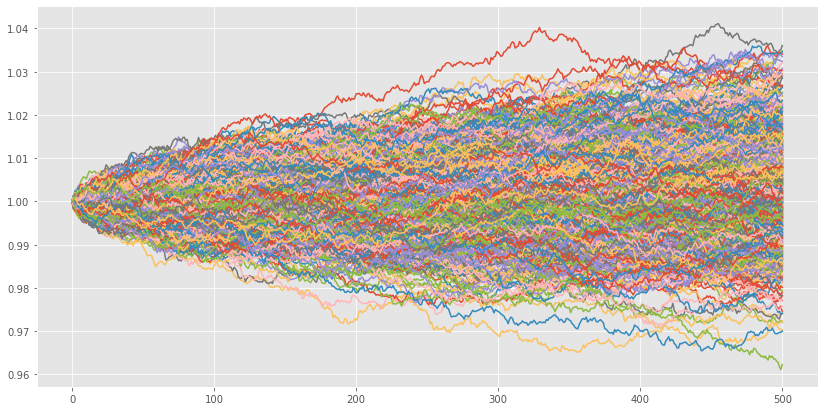

In [856]:
all_strong.plot(legend=False, title=f'Simulated Trade {df_all.columns}')

In [857]:
confidence_interval = all_strong.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = all_strong.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
all_metrics = metrics.append(ci_series)
all_metrics

count           1000.000000
mean               1.002764
std                0.011153
min                0.962281
25%                0.995096
50%                1.002834
75%                1.010183
max                1.036047
95% CI Lower       0.981868
95% CI Upper       1.024969
Name: 500, dtype: float64

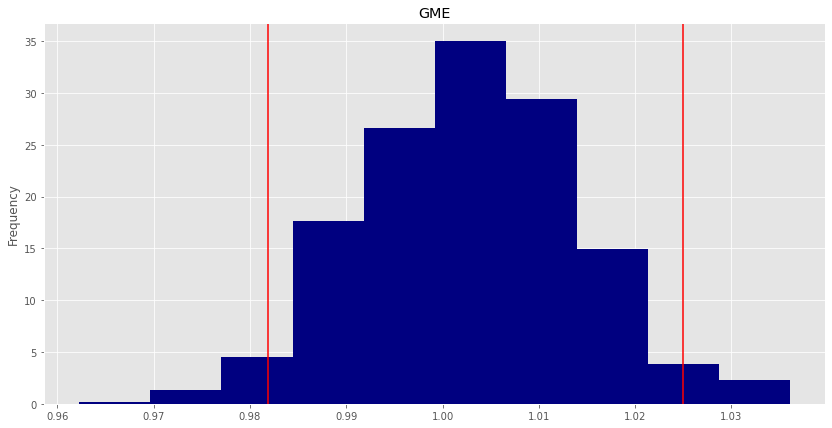

In [858]:
all_strong.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title='Portfolio of all Strong Performers')
plt.axvline(all_metrics[8], color='r')
plt.axvline(all_metrics[9], color='r')
plt.show()

In [859]:
ci_lower = round(all_metrics[8]*1000,2)
ci_upper = round(all_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $981.87 and $1024.97.


### Experiment 2: ['AAPL', 'AMZN'] porfolio with 50/50 split

In [865]:
amz_aapl = stock_price_simulation(df_all[['AAPL', 'AMZN']], [0.5, 0.5])  

<AxesSubplot:>

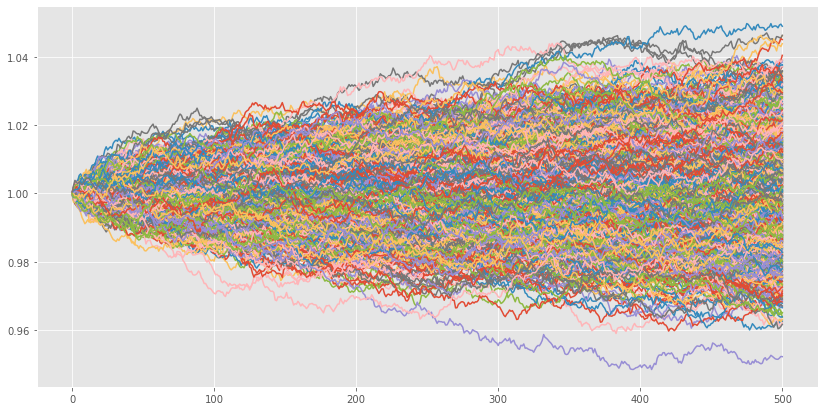

In [866]:
amz_aapl.plot(legend=False, title='Simulated Trade AAPL and AMZN')

In [867]:
confidence_interval = amz_aapl.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = price_path.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
amz_aapl_metrics = metrics.append(ci_series)
amz_aapl_metrics

count           1000.000000
mean               1.001459
std                0.015800
min                0.952239
25%                0.990259
50%                1.001763
75%                1.012106
max                1.048948
95% CI Lower       0.971198
95% CI Upper       1.032735
Name: 500, dtype: float64

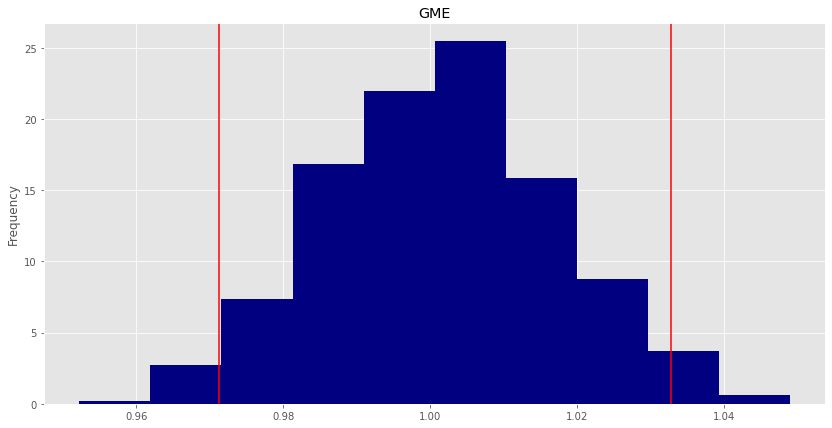

In [868]:
amz_aapl.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title='Porfolio 50/50 AAPL & AMZN')
plt.axvline(amz_aapl_metrics[8], color='r')
plt.axvline(amz_aapl_metrics[9], color='r')
plt.show()

In [869]:
ci_lower = round(amz_aapl_metrics[8]*1000,2)
ci_upper = round(amz_aapl_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $971.2 and $1032.74.


### Experiment 3: Low performing stocks porftolio ['FARM', 'GLBS'] with 50/50 split

In [42]:
df_all_p = pd.concat([i[1].rename(columns={'close':i[0]}) for i in p_close], axis=1).dropna()

In [43]:
df_all_p.columns

Index(['CCL', 'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS'], dtype='object')

<AxesSubplot:>

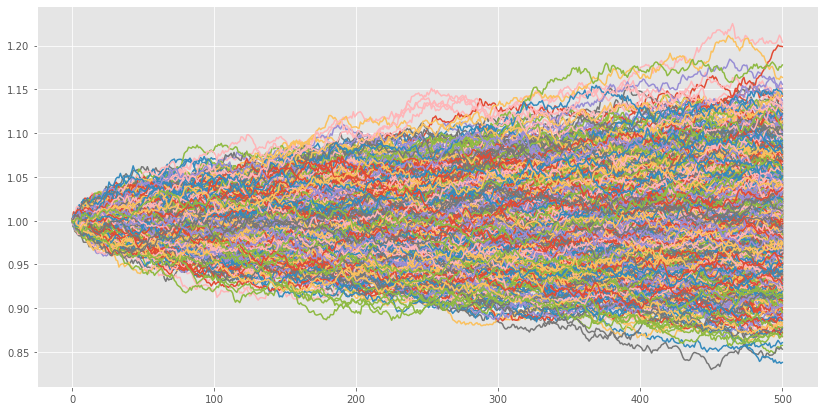

In [876]:
weak_ps = stock_price_simulation(df_all_p[['FARM', 'GLBS']], [0.5, 0.5])  
weak_ps.plot(legend=False, title='Simulated Trade FARM & GLBS')

In [877]:
confidence_interval = weak_ps.iloc[-1, :].quantile(q=[0.025, 0.975])
metrics = price_path.iloc[-1].describe()
ci_series = confidence_interval
ci_series.index = ["95% CI Lower","95% CI Upper"]
weak_ps_metrics = metrics.append(ci_series)
weak_ps_metrics

count           1000.000000
mean               1.003027
std                0.056792
min                0.837997
25%                0.964407
50%                1.002566
75%                1.041367
max                1.203717
95% CI Lower       0.891645
95% CI Upper       1.120202
Name: 500, dtype: float64

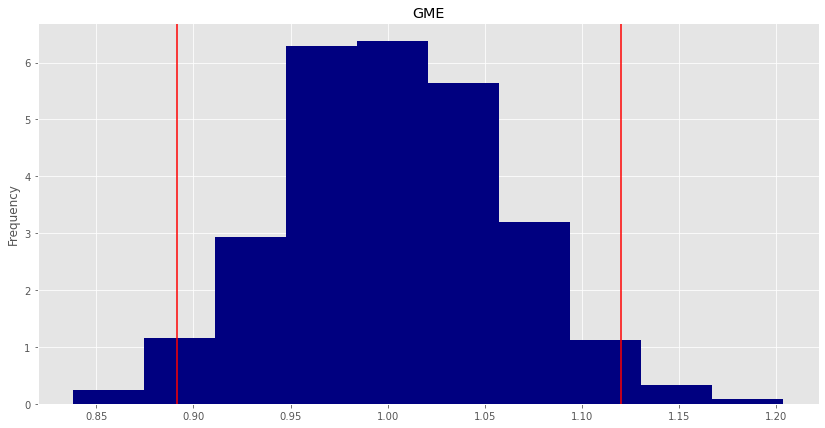

In [878]:
weak_ps.iloc[-1, :].plot(kind='hist', bins=10,density=True, color='navy', title= "Porfolio 50/50 FARM & GLBS")
plt.axvline(weak_ps_metrics[8], color='r')
plt.axvline(weak_ps_metrics[9], color='r')
plt.show()

In [879]:
ci_lower = round(weak_ps_metrics[8]*1000,2)
ci_upper = round(weak_ps_metrics[9]*1000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $1,000 in "
        f" over the next 3 years will end within in the range of"
        f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $1,000 in  over the next 3 years will end within in the range of $891.64 and $1120.2.


# 5. Creating Features

In [91]:
porfolio = ['TSLA', 'AAPL', 'NFLX']
weights = [0.33, 0.33, 0.33]

In [92]:
stocks_combines = pd.concat([df_all, df_all_p], join='inner', axis=1)

In [174]:
stocks_combines.columns

Index(['TSLA', 'ZM', 'MRNA', 'AMZN', 'NFLX', 'NVDA', 'AAPL', 'GME', 'CCL',
       'MRO', 'UAL', 'SLB', 'OKE', 'FARM', 'GLBS'],
      dtype='object')

In [98]:
porfolio_df = stocks_combines[porfolio]

In [99]:
wt_returns = porfolio_df.pct_change().dropna() * weights

In [100]:
wt_returns.sum(axis=1)

date
2019-04-22    0.003951
2019-04-23    0.010183
2019-04-24   -0.013681
2019-04-25   -0.022270
2019-04-26   -0.012378
                ...   
2021-07-01    0.003213
2021-07-02    0.007216
2021-07-06    0.000200
2021-07-07   -0.005005
2021-07-08   -0.002060
Length: 559, dtype: float64

In [101]:
porfolio_df['total'] = (porfolio_df*weights).sum(axis=1)
porfolio_df

<ipython-input-101-4a9c685bfff8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porfolio_df['total'] = (porfolio_df*weights).sum(axis=1)


TSLA        AAPL    NFLX       total
date                                               
2019-04-18   54.652   49.831914  360.35  153.395192
2019-04-22   52.550   49.995690  377.34  158.362278
2019-04-23   52.780   50.716793  381.89  160.177642
2019-04-24   51.732   50.638572  374.23  157.278189
2019-04-25   49.526   50.179021  368.33  154.451557
...             ...         ...     ...         ...
2021-07-01  677.920  137.270000  533.54  445.080900
2021-07-02  678.900  139.960000  533.98  446.437200
2021-07-06  659.580  142.020000  541.64  443.269200
2021-07-07  644.650  144.570000  535.96  437.309400
2021-07-08  652.810  143.240000  530.76  437.847300

[560 rows x 4 columns]

In [103]:
wt_returns = porfolio_df.pct_change()['total'].dropna()

<AxesSubplot:xlabel='date'>

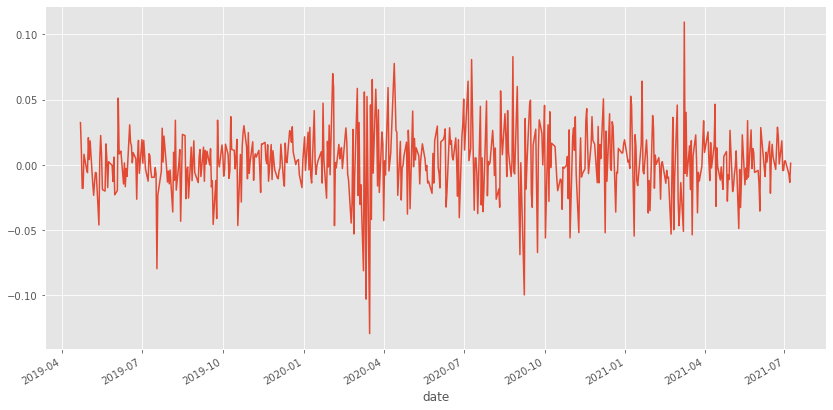

In [105]:
wt_returns.plot()

### Optimize Porfolio Weights

In [178]:
import cvxpy as cvx

def optimization(symbols):
    A, B = symbols
    porfolio_df = stocks_combines[symbols]
    corAB = porfolio_df.corr().values.ravel()[1]
    cov = np.sqrt(porfolio_df[A].var()) * np.sqrt(porfolio_df[B].var()) * corAB
    x = cvx.Variable(2)
    p = np.array([[porfolio_df[A].var(), cov], [cov, porfolio_df[B].var()]])
    objective = cvx.Minimize(cvx.quad_form(x, p))
    constraints = [sum(x) == 1]
    problem = cvx.Problem(objective, constraints)
    min_value = problem.solve()
    xA, xB = x.value
    weights = [xA, xB]
    return weights


In [192]:
def optim_portfolio(returns, index_weights, scale=0.0001):
    m = len(index_weights)
    cov = np.cov(returns)
    x = cvx.Variable(m)
    
    portfolio_var = cvx.quad_form(x, cov)
    
    distance_to_index = cvx.norm(x - index_weights, p=2, axis=None)
    
    objective = cvx.Minimize(portfolio_var + scale * distance_to_index)
    
    constraints = [x >= 0, sum(x)==1]
    
    problem = cvx.Problem(objective, constraints)
    min_values = problem.solve()
    x_values = x.value
    
    return x_values

In [224]:
def get_returns_array(symbols):
    n = []
    for i in symbols:
        print(i)
        n.append(stocks_combines[i].pct_change().values)
    return np.append(*n)

In [225]:
symboles = ['NFLX', 'ZM']
weights = optimization(symboles)
weights

[1.6165912437399819, -0.6165912437399816]

In [227]:
symboles = ['AMZN', 'ZM']
returns = get_returns_array(symboles)

AMZN
ZM


In [228]:
optim_portfolio(returns, np.array([0.6, 0.4]))

Exception: Invalid dimensions for arguments.

<AxesSubplot:xlabel='date'>

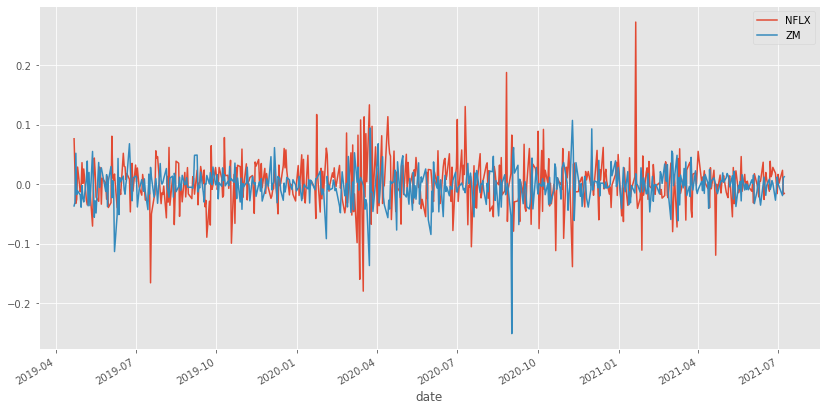

In [191]:
(stocks_combines[symboles].pct_change() * weights).plot()

<AxesSubplot:xlabel='date'>

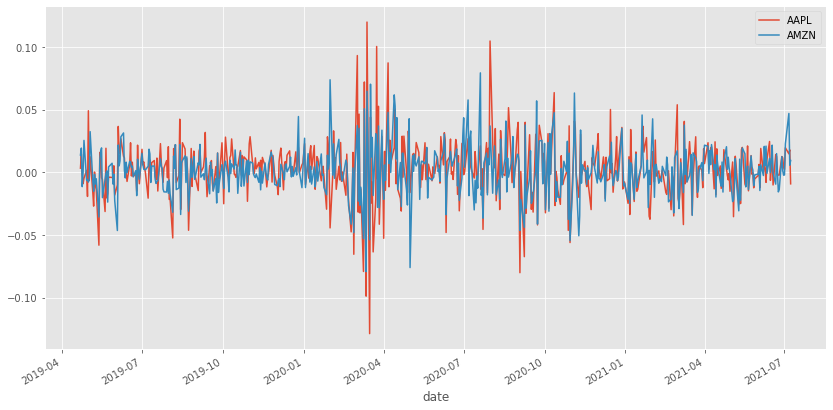

In [173]:
porfolio_df.pct_change().plot()